In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
img=cv2.imread("../../../img/3.jfif")

# 缩放resize


Text(0.5, 1.0, '自己手动指定像素')

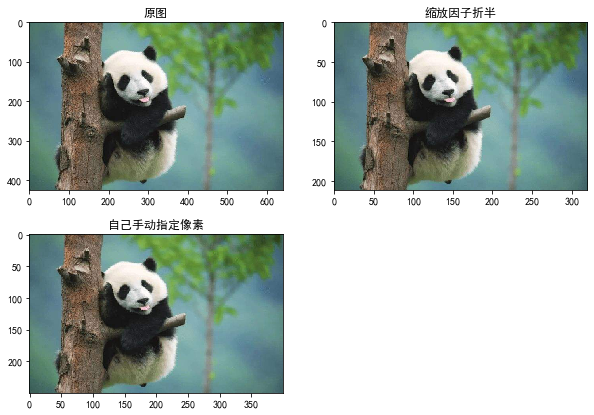

In [16]:
# 使用缩放因子
res=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)

# 直接指定(width,height)
res2=cv2.resize(img,(400,250),interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10,7))

plt.subplot(221)
plt.imshow(img[:,:,[2,1,0]])
plt.title("原图")

plt.subplot(222)
plt.imshow(res[:,:,[2,1,0]])
plt.title("缩放因子折半")

plt.subplot(223)
plt.imshow(res2[:,:,[2,1,0]])
plt.title("自己手动指定像素")

坐标轴已经变咧，减半了